# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
# Посмотрим на полученную в результате предобработки таблицу

data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [24]:
# Для ответа на вопрос `Есть ли зависимость между количеством детей и возвратом кредита в срок?` построим сводную таблицу

data_pivot_children = data.pivot_table(index=['children'], columns='debt', values='gender',\
                                       aggfunc='count').reset_index()
data_pivot_children

debt,children,0,1
0,0,13028.0,1063.0
1,1,4364.0,444.0
2,2,1858.0,194.0
3,3,303.0,27.0
4,4,37.0,4.0
5,5,9.0,NaN


Появились пропущенные значения в строках с информацией о клиентах, у которых 5 детей. Посмотрим на эти строки:

In [25]:
data.loc[data['children'] == 5]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
3979,5,1572.328285,42,среднее,1,гражданский брак,1,M,сотрудник,0,142594,на покупку своего автомобиля,C,операции с автомобилем
4397,5,3248.839837,36,среднее,1,женат / замужем,0,F,компаньон,0,168460,операции с недвижимостью,C,операции с недвижимостью
7866,5,773.124856,36,среднее,1,женат / замужем,0,F,сотрудник,0,48772,операции с жильем,D,операции с недвижимостью
15822,5,418.199982,31,среднее,1,женат / замужем,0,F,сотрудник,0,77552,сделка с подержанным автомобилем,C,операции с автомобилем
15916,5,2286.262752,37,среднее,1,женат / замужем,0,F,сотрудник,0,256698,покупка недвижимости,B,операции с недвижимостью
16211,5,387.317579,35,среднее,1,гражданский брак,1,F,госслужащий,0,126102,на проведение свадьбы,C,проведение свадьбы
20452,5,268.425464,38,начальное,3,женат / замужем,0,F,сотрудник,0,212545,заняться высшим образованием,B,получение образования
20837,5,2386.600221,35,среднее,1,женат / замужем,0,F,компаньон,0,204241,жилье,B,операции с недвижимостью
21156,5,1690.018117,59,среднее,1,женат / замужем,0,M,сотрудник,0,269068,операции со своей недвижимостью,B,операции с недвижимостью


В данном случае пропуски случайные: у нас в таблице всего 9 клиентов, у которых по 5 детей, и все они не являются должниками. Значит, в сводной таблице можно заменить пропущенные значения нулями. Также для наглядности переименуем столбцы 0 и 1, и добавим столбцы с вычислением соотношений.

In [26]:
data_pivot_children[1] = data_pivot_children[1].fillna(0)
data_pivot_children = data_pivot_children.rename(columns={0:'no_debts', 1:'yes_debts'})
data_pivot_children['no_debt%'] = data_pivot_children['no_debts']*100/(data_pivot_children['no_debts'] + data_pivot_children['yes_debts'])
data_pivot_children['yes_debt%'] = data_pivot_children['yes_debts']*100/(data_pivot_children['no_debts'] + data_pivot_children['yes_debts'])
data_pivot_children

debt,children,no_debts,yes_debts,no_debt%,yes_debt%
0,0,13028.0,1063.0,92.456178,7.543822
1,1,4364.0,444.0,90.765391,9.234609
2,2,1858.0,194.0,90.545809,9.454191
3,3,303.0,27.0,91.818182,8.181818
4,4,37.0,4.0,90.243902,9.756098
5,5,9.0,0.0,100.000000,0.000000


In [27]:
# Для отрисовки графиков создадим другой вариант сводной таблицы

aaa = data.pivot_table(index='debt', columns='children', values='gender', aggfunc='count')\
.fillna(0).reset_index().drop('debt', axis=1)
aaa

children,0,1,2,3,4,5
0,13028.0,4364.0,1858.0,303.0,37.0,9.0
1,1063.0,444.0,194.0,27.0,4.0,0.0


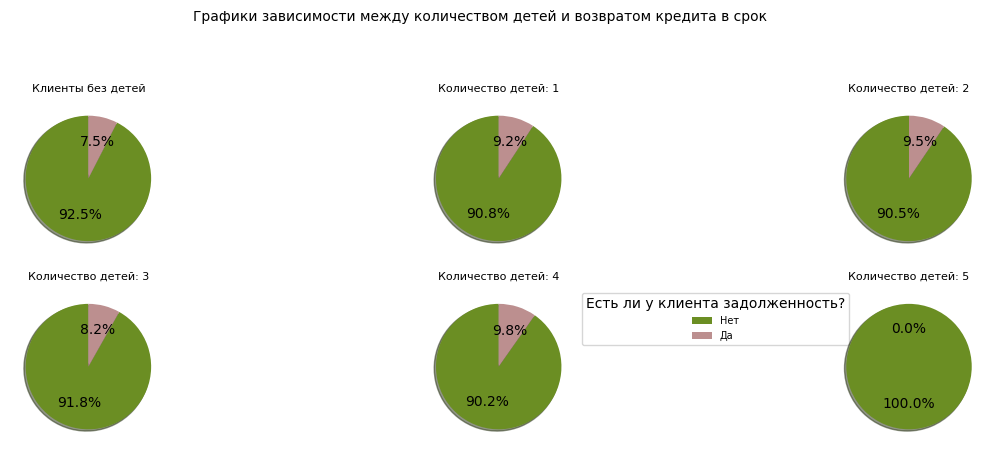

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(15,5)) 

plt.subplots_adjust(wspace=0.2, hspace=0.2, top=0.8)
fig.suptitle('Графики зависимости между количеством детей и возвратом кредита в срок', fontsize=10)

ax1 = plt.subplot2grid((2,3),(0,0))
plt.pie(aaa[0], colors=['olivedrab', 'rosybrown'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Клиенты без детей', fontsize=8)

ax1 = plt.subplot2grid((2,3), (0,1))
plt.pie(aaa[1], colors=['olivedrab', 'rosybrown'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Количество детей: 1', fontsize=8)

ax1 = plt.subplot2grid((2,3), (0,2))
plt.pie(aaa[2], colors=['olivedrab', 'rosybrown'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Количество детей: 2', fontsize=8)

ax1 = plt.subplot2grid((2,3), (1,0))
plt.pie(aaa[3], colors=['olivedrab', 'rosybrown'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Количество детей: 3', fontsize=8)

ax1 = plt.subplot2grid((2,3), (1,1))
plt.pie(aaa[4], colors=['olivedrab', 'rosybrown'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Количество детей: 4', fontsize=8)

plt.legend(('Нет', 'Да'), title='Есть ли у клиента задолженность?', fontsize=7, loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax1 = plt.subplot2grid((2,3), (1,2))
plt.pie(aaa[5], colors=['olivedrab'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Количество детей: 5', fontsize=8)

plt.show()

**Вывод:** 

Наблюдается зависимость между количеством детей и возвратом кредита в срок.

У бездетных клиентов процент долга ниже, и составляет 7.5%, т.е. это самая низкоризковая категория. 

Что касается клиентов с детьми, то тут процент клиентов с долгами примерно одинаковый  для всех категорий: 
- 9.2% - для клиентов с одним ребенком,
- 9.5% - для клиентов с двумя детьми,
- 8.2% - для клиентов с тремя детьми,
- 9.8% - для многодетных с 4-мя детьми.

Выделяется группа  с 5-ю детьми, однако это всего 9 человек, что состаляет менее 1% от общей выборки, а значит, этот результат не показательный. 

В целом не целесообразно делать выводы для клиентов с 3+ детей, потому что в этих группах мало наблюдений, и выводы могут быть не репрезентативны.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [29]:
data_pivot_family_status = data.pivot_table(index=['family_status'], columns='debt',\
                                            values='gender', aggfunc='count')\
.reset_index().rename(columns={0:'no_debts', 1:'yes_debts'})

data_pivot_family_status['no_debt%'] = data_pivot_family_status['no_debts']*100\
/(data_pivot_family_status['no_debts'] + data_pivot_family_status['yes_debts'])
data_pivot_family_status['yes_debt%'] = data_pivot_family_status['yes_debts']*100\
/(data_pivot_family_status['no_debts'] + data_pivot_family_status['yes_debts'])

data_pivot_family_status

debt,family_status,no_debts,yes_debts,no_debt%,yes_debt%
0,Не женат / не замужем,2523,273,90.236052,9.763948
1,в разводе,1105,84,92.935240,7.064760
2,вдовец / вдова,888,63,93.375394,6.624606
3,гражданский брак,3749,385,90.686986,9.313014
4,женат / замужем,11334,927,92.439442,7.560558


In [30]:
# Для отрисовки графиков создадим другой вариант сводной таблицы

aa = data.pivot_table(index='debt', columns='family_status', values='gender', aggfunc='count')\
.reset_index().rename(columns={0:'no_debts', 1:'yes_debts'})
aa

family_status,debt,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
0,0,2523,1105,888,3749,11334
1,1,273,84,63,385,927


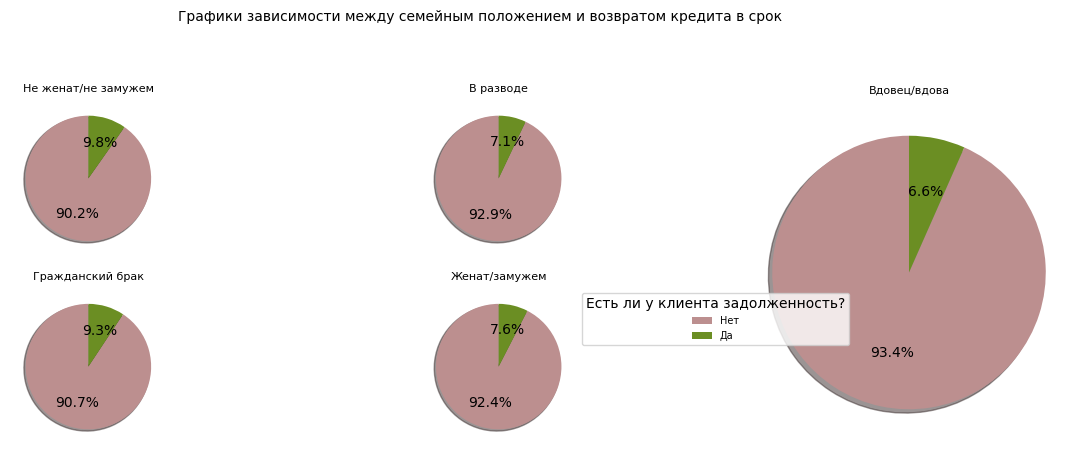

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(15,5)) 

plt.subplots_adjust(wspace=0.2, hspace=0.2, top=0.8)
fig.suptitle('Графики зависимости между семейным положением и возвратом кредита в срок', fontsize=10)

ax1 = plt.subplot2grid((2,3),(0,0))
plt.pie(aa['Не женат / не замужем'], colors=['rosybrown', 'olivedrab'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Не женат/не замужем', fontsize=8)

ax1 = plt.subplot2grid((2,3), (0,1))
plt.pie(aa['в разводе'], colors=['rosybrown', 'olivedrab'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('В разводе', fontsize=8)

ax1 = plt.subplot2grid((2,3), (0,2), colspan=1, rowspan=2)
plt.pie(aa['вдовец / вдова'], colors=['rosybrown', 'olivedrab'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Вдовец/вдова', fontsize=8)

ax1 = plt.subplot2grid((2,3), (1,0))
plt.pie(aa['гражданский брак'], colors=['rosybrown', 'olivedrab'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Гражданский брак', fontsize=8)

ax1 = plt.subplot2grid((2,3), (1,1))
plt.pie(aa['женат / замужем'], colors=['rosybrown', 'olivedrab'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Женат/замужем', fontsize=8)

plt.legend(('Нет', 'Да'), title='Есть ли у клиента задолженность?', fontsize=7, loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**Вывод:** 

Наблюдается зависимость между семейным положением и возвратом кредита в срок. 
Самая низкорисковая категория - вдовец/вдова, должников в этой категории всего 6.6%.  
Самая высокорисковая категория - Неженат/не замужем, с показателем 9.8% должников.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [33]:
data_pivot_income_category = data.pivot_table(index=['total_income_category'], columns='debt',\
                                            values='gender', aggfunc='count')\
.reset_index().rename(columns={0:'no_debts', 1:'yes_debts'})

data_pivot_income_category['no_debt%'] = data_pivot_income_category['no_debts']*100\
/(data_pivot_income_category['no_debts'] + data_pivot_income_category['yes_debts'])
data_pivot_income_category['yes_debt%'] = data_pivot_income_category['yes_debts']*100\
/(data_pivot_income_category['no_debts'] + data_pivot_income_category['yes_debts'])

data_pivot_income_category

debt,total_income_category,no_debts,yes_debts,no_debt%,yes_debt%
0,A,23,2,92.000000,8.000000
1,B,4660,354,92.939769,7.060231
2,C,14568,1353,91.501790,8.498210
3,D,328,21,93.982808,6.017192
4,E,20,2,90.909091,9.090909


In [34]:
# Для наглядности добавим описание групп в таблицу

def income_values(category):
    try:
        if category == 'E':
            return 'до 30000'
        elif category == 'D':
            return '30001...50000'
        elif category == 'C':
            return '50001...200000'
        elif category == 'B':
            return '200001...1000000'
        elif category == 'A':
            return 'более 1000000'
    except:
        pass

In [35]:
data_pivot_income_category['total_income_value'] = data_pivot_income_category['total_income_category'].apply(income_values)
data_pivot_income_category

debt,total_income_category,no_debts,yes_debts,no_debt%,yes_debt%,total_income_value
0,A,23,2,92.000000,8.000000,более 1000000
1,B,4660,354,92.939769,7.060231,200001...1000000
2,C,14568,1353,91.501790,8.498210,50001...200000
3,D,328,21,93.982808,6.017192,30001...50000
4,E,20,2,90.909091,9.090909,до 30000


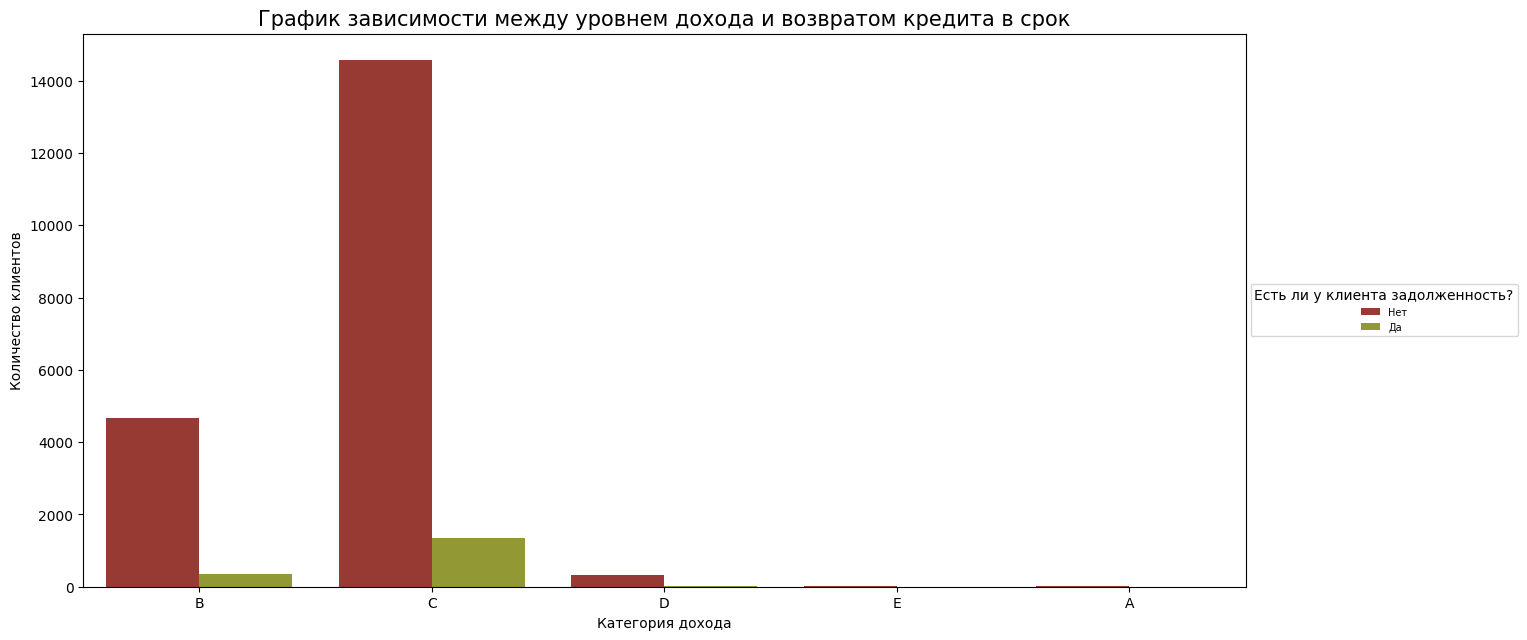

In [36]:
plt.figure(figsize=(15,7)) 

plt.subplots_adjust(wspace=0.2, hspace=0.2, top=0.9)
plt.title('График зависимости между уровнем дохода и возвратом кредита в срок', fontsize=15)

sns.countplot(x='total_income_category', hue='debt', data=data, palette=sns.hls_palette(l=.4))
plt.legend(('Нет', 'Да'), title='Есть ли у клиента задолженность?', fontsize=7, loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.xlabel('Категория дохода', fontsize=10)
plt.ylabel('Количество клиентов', fontsize=10)

plt.show()

**Вывод:** 

Наблюдается зависимость между уровнем дохода и возвратом кредита в срок.
В группе с доходом от 200 000 до 1 000 000 (В) доля должников ниже, чем в группе  доходом от 50 000 до 200 000 (С) - 7% потив 8.5%.

Группы с доходами до 30000(E),  от 30000 до 50000 (D) и более 1 000 000 (A) учитывать не целесообразно из-за низкой численности клиентов в них: суммарно в трех этих группах клиентов менее 2% от общего числа.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [38]:
data_pivot_purpose_category = data.pivot_table(index=['purpose_category'], columns='debt',\
                                            values='gender', aggfunc='count')\
.reset_index().rename(columns={0:'no_debts', 1:'yes_debts'})

data_pivot_purpose_category['no_debt%'] = data_pivot_purpose_category['no_debts']*100\
/(data_pivot_purpose_category['no_debts'] + data_pivot_purpose_category['yes_debts'])
data_pivot_purpose_category['yes_debt%'] = data_pivot_purpose_category['yes_debts']*100\
/(data_pivot_purpose_category['no_debts'] + data_pivot_purpose_category['yes_debts'])

data_pivot_purpose_category

debt,purpose_category,no_debts,yes_debts,no_debt%,yes_debt%
0,операции с автомобилем,3879,400,90.652022,9.347978
1,операции с недвижимостью,9971,780,92.744861,7.255139
2,получение образования,3619,369,90.747242,9.252758
3,проведение свадьбы,2130,183,92.088197,7.911803


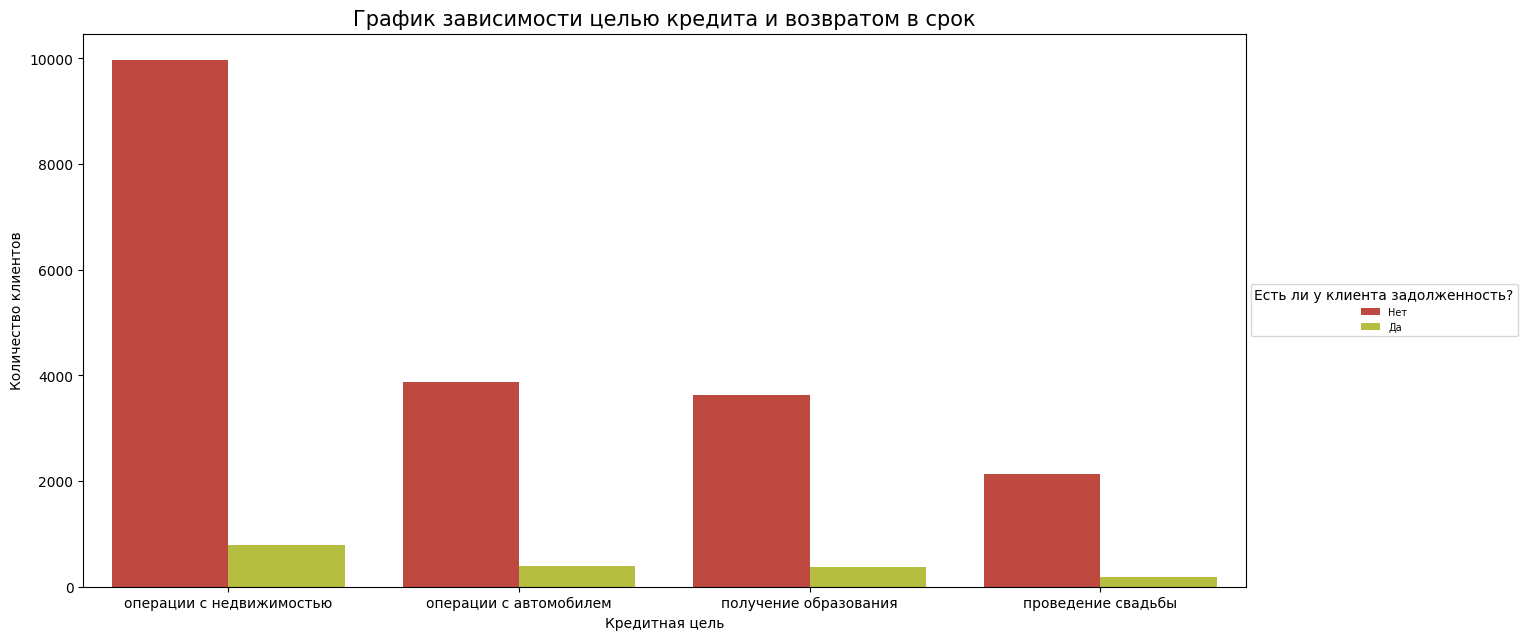

In [39]:
plt.figure(figsize=(15,7)) 

plt.subplots_adjust(wspace=0.2, hspace=0.2, top=0.9)
plt.title('График зависимости целью кредита и возвратом в срок', fontsize=15)

sns.countplot(x='purpose_category', hue='debt', data=data, palette=sns.hls_palette(l=.5))
plt.legend(('Нет', 'Да'), title='Есть ли у клиента задолженность?', fontsize=7, loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.xlabel('Кредитная цель', fontsize=10)
plt.ylabel('Количество клиентов', fontsize=10)

plt.show()

**Вывод:** 

Цели кредита также влияют на его возврат в срок. 

Самый высокий процент невозвратов кредита в срок у тех, кто брал кредиты на операции с автомобилем. Вторая категория в группе риска - образование. Самая "надежная" кредитная цель - операции с недвижимостью.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 

В исходных данных пропуски обнаружены в двух столбцах:
- days_employed — общий трудовой стаж в днях
- total_income — ежемесячный доход

Это столбцы с количественными данными, и пропуски в них могут быть вызваны как человеческим фактором(лень подсчитывать трудовой стаж), так и какими-то сбоями при загрузке данных.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

В случае с количественными данными заполнение пропусков медианным значением позволяет исключить влияние выбросов на результат, и таким образом сделать расчеты более точными и приближенными к реальной картине.

### Шаг 4: общий вывод.

На возврат кредита в срок влияют разные факторы:

**1. Наличие детей.** 
Анализ показал, что среди бездетных клиентов доля должников составляет всего и 7.5%, тогда как среди клиентов с детьми доли должников колеблются от 8.2 до 9.8%. При этом количество детей несущественно влияет на возврат кредита в срок.

**2. Семейное положение.**
Наблюдается зависимость между семейным положением и возвратом кредита в срок. Самая низкорисковая категория - вдовец/вдова, должников в этой категории всего 6.6%.
Самая высокорисковая категори - Неженат/не замужем, с показателем 9.8% должников.

**3. Уровень дохода.**
Наблюдается зависимость между уровнем дохода и возвратом кредита в срок.
В группе с доходом от 200 000 до 1 000 000 доля должников ниже, чем в группе  доходом от 50 000 до 200 000 - 7% потив 8.5%.
Группы с доходами до 30000, 30000-50000 и более 1 000 000 учитывать не целесообразно из-за низкой численности клиентов в них: суммарно в трех этих группах клиентов менее 2% от общего числа.

**4. Цель кредита.**
Цели кредита также влияют на его возврат в срок.Самый высокий процент невозвратов кредита в срок у тех, кто брал кредиты на операции с автомобилем. Вторая категория в группе риска - образование. Самая "надежная" кредитная цель - операции с недвижимостью.


В результате проведенного анализа данных, были выявлены определенные зависимости, на основании которых можно построить модель кредитного скоринга в первом приближении. 

Например, неженатый заемщик с ребенком, с уровнем дохода до 200 000, берущий кредит на покупку авто - это самая рискованная категория. А семьи с детьми, берущие ипотеку - это надежный клиент.

Возможно, здесь играет роль фактор возраста - кредиты на авто и образование (высокорисковые цели с точки зрения погашения в срок) берут преимущественно молодые люди, а ипотеку - более зрелые. Однако для проверки этой гипотезы необходимо сделать более углубленный анализ данных.